<a href="https://colab.research.google.com/github/YATABARE-Cheikna-Amala/Algorithme_de_Machine_Learning/blob/main/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K means pour le clustering**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'facebook-live-sellers-in-thailand-uci-ml-repo' dataset.
Path to dataset files: /kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo


In [18]:
!ls /root/.cache/kagglehub/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo/versions/1


Live.csv


In [19]:
data = pd.read_csv(
    "/root/.cache/kagglehub/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo/versions/1/Live.csv"
)
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## EDA

In [20]:
# Suppression des variables unitiles
col  =['Column1', 'Column2', 'Column3', 'Column4', 'status_published']
data.drop(col, axis = 1, inplace = True)

In [21]:
data.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [22]:
# redefinissons l'index avec status_index
data  = data.set_index('status_id')


In [23]:
# verification des valeurs manquantes
data.isnull().sum()

,0
status_type,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0


In [25]:
# Desciption des données
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


## Step 1: Analyse univarié

array([[<Axes: title={'center': 'num_reactions'}>,
        <Axes: title={'center': 'num_comments'}>,
        <Axes: title={'center': 'num_shares'}>],
       [<Axes: title={'center': 'num_likes'}>,
        <Axes: title={'center': 'num_loves'}>,
        <Axes: title={'center': 'num_wows'}>],
       [<Axes: title={'center': 'num_hahas'}>,
        <Axes: title={'center': 'num_sads'}>,
        <Axes: title={'center': 'num_angrys'}>]], dtype=object)

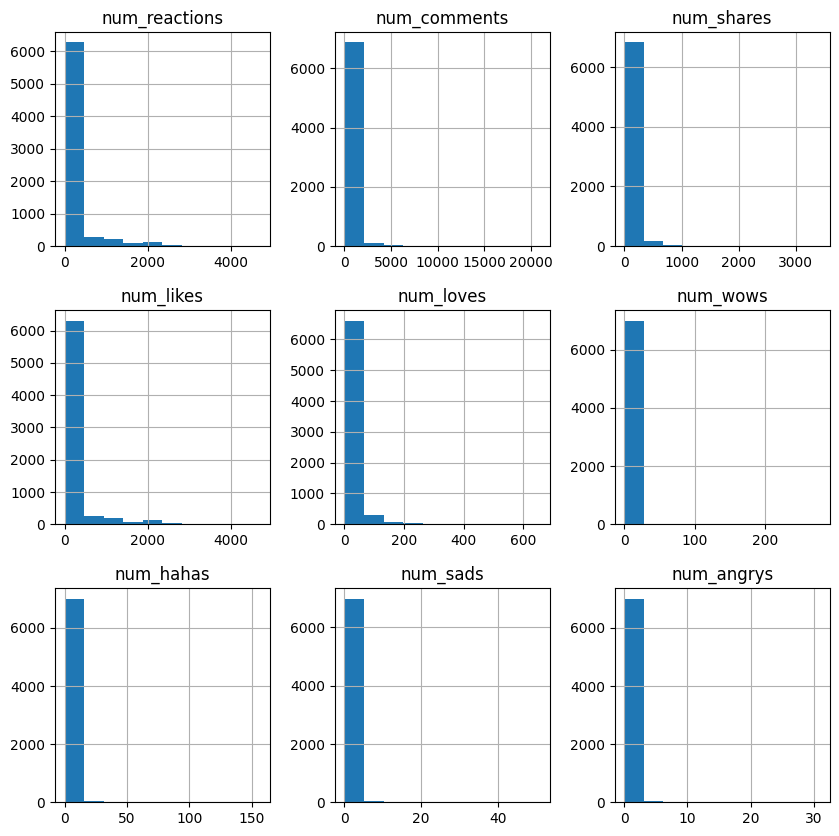

In [36]:
# Barplot des variables quantitatives
var_quantitative = data.select_dtypes(include=['int64', 'float64'])
var_quantitative.hist(figsize=(10,10))

<Axes: title={'center': 'Répartition des types de live Facebook'}, xlabel='status_type'>

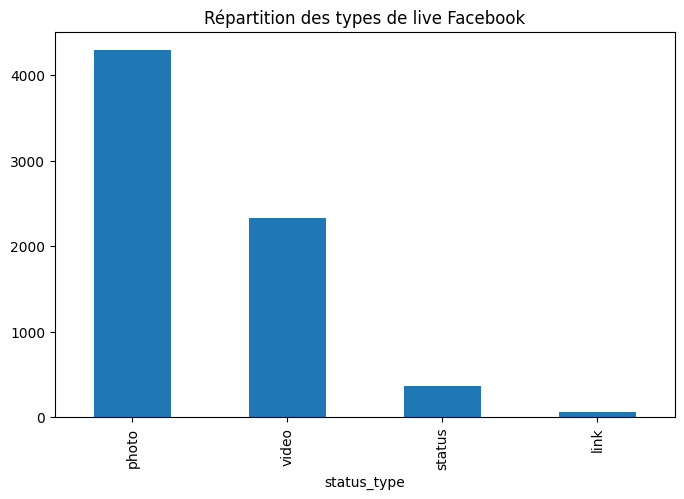

In [32]:
var_quanlitative = data.select_dtypes(include=['object'])
data['status_type'].value_counts().plot(
    kind='bar',
    figsize=(8,5),
    title='Répartition des types de live Facebook'
)

## Step 2: Analyse Bivarié


In [34]:
correlation = var_quantitative.corr(
    method='pearson',
    min_periods=1
)
correlation

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


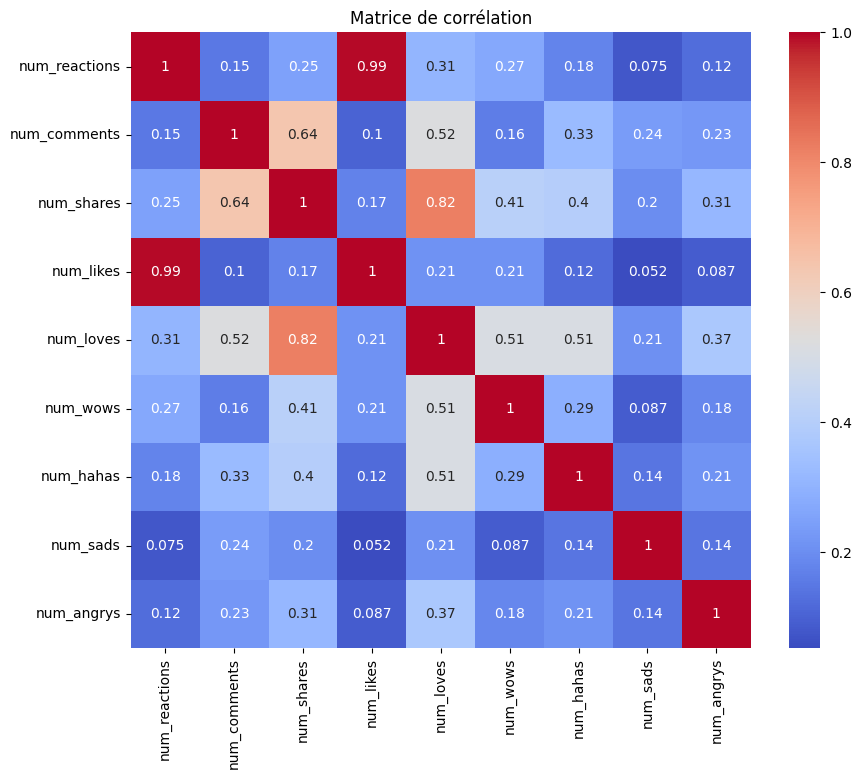

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(var_quantitative.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

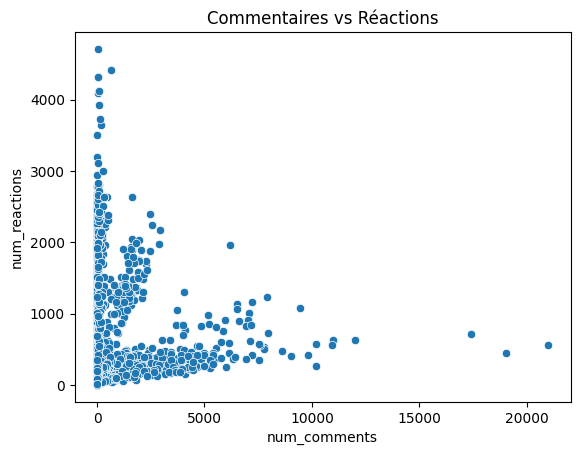

In [43]:
sns.scatterplot(
    x='num_comments',
    y='num_reactions',
    data=data
)
plt.title("Commentaires vs Réactions")
plt.show()


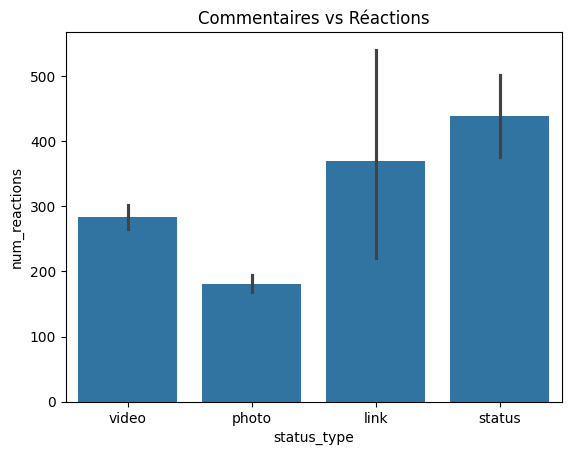

In [44]:
sns.barplot(
    x='status_type',
    y='num_reactions',
    data=data
)
plt.title("Commentaires vs Réactions")
plt.show()

## Realisation de l'ACP

In [51]:
# Var quantitative
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(var_quantitative)

encoder = LabelEncoder()
data['status_type'] = encoder.fit_transform(data['status_type'])

# Normaliser la base de donnée
data_num_scaled = pd.DataFrame(data_num_scaled, columns=var_quantitative.columns)

In [52]:
pca = PCA()
df_pca = pca.fit(data_num_scaled)

### coudes d'elbow

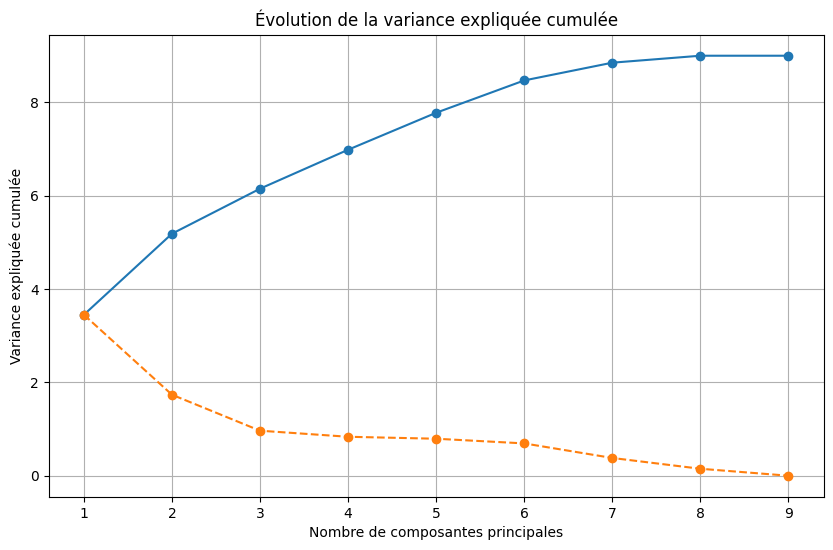

In [53]:
explained_variance = pca.explained_variance_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Évolution de la variance expliquée cumulée')
plt.grid(True)
plt.show()

In [58]:
pc1= pca.components_[0]
pc2 =pca.components_[1]

### Cercle de correlation

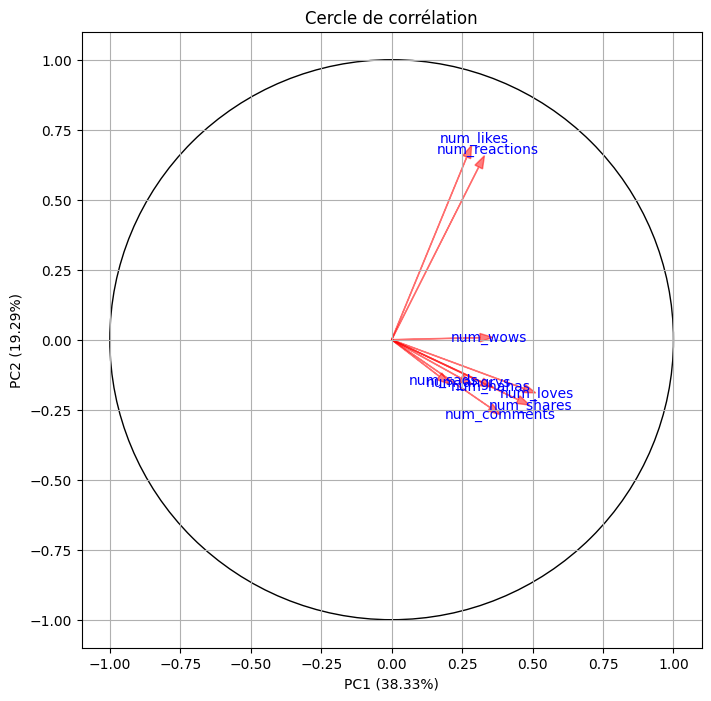

In [59]:
# Cercle de correlation
plt.figure(figsize=(8,8))

# Cercle unité
circle = plt.Circle((0,0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Flèches représentant les variables
for i, var in enumerate(var_quantitative.columns):
    plt.arrow(0, 0, pc1[i], pc2[i], color='r', alpha=0.5, head_width=0.03)
    plt.text(pc1[i]*1.1, pc2[i]*1.1, var, color='b', ha='center', va='center')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('PC1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Cercle de corrélation')
plt.grid()
plt.show()



## Fixation du K pour le K mean.
pour cela on va donner un ensemble de valeurs a k avec la regle du coude pour determiner le nombre de Cluster.

In [60]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_num_scaled)
    inertia.append(kmeans.inertia_)


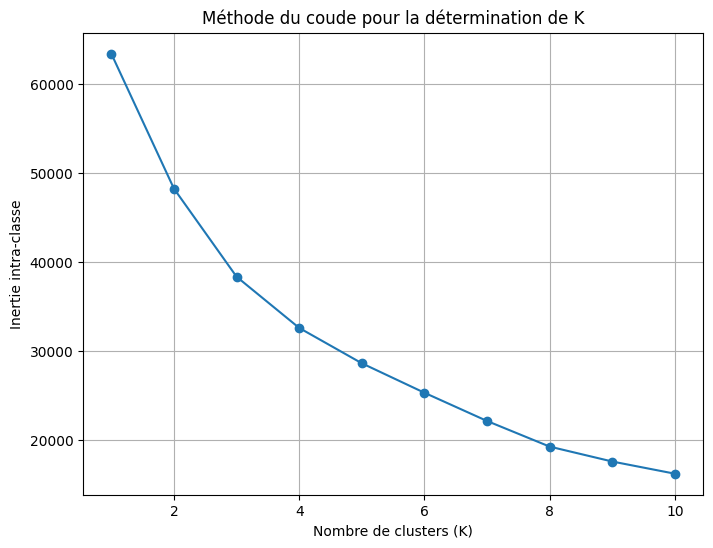

In [61]:
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude pour la détermination de K")
plt.grid(True)
plt.show()


In [64]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_num_scaled)
    print(f"K={k} | Silhouette score = {silhouette_score(data_num_scaled, labels):.3f}")


K=2 | Silhouette score = 0.816
K=3 | Silhouette score = 0.750
K=4 | Silhouette score = 0.757
K=5 | Silhouette score = 0.761
K=6 | Silhouette score = 0.714
K=7 | Silhouette score = 0.718


On retient alors 2 clusters pour cette representations.

In [65]:
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_num_scaled)

In [66]:
data['cluster'] = clusters

In [67]:
data.head()
data['cluster'].value_counts()


,count
cluster,
0,6405
2,372
1,273


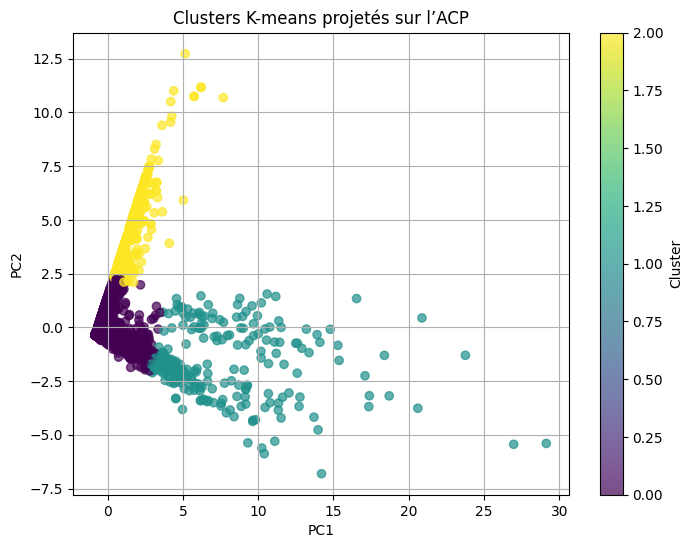

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_num_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters K-means projetés sur l’ACP")
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
